# Diabetes Dataset
1. age
2. sex
3. body mass index (bmi)
4. average blood pressure (bp)

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd 

In [2]:
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Target: progression (numeric assessment of the progression of the disease in a year)

In [4]:
df['progression'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


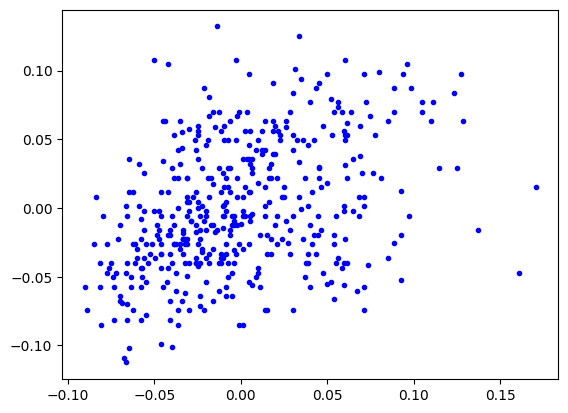

In [5]:
import matplotlib.pyplot as plt 

plt.plot(df['bmi'], df['bp'], 'b.')
plt.show()

# Polynomial Exercise 1
* X = bmi
* y = blood preasure

In [6]:
X = df[['bmi']]
y = df['bp']

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poli_features = PolynomialFeatures(degree=10, include_bias=False)
X_poli = poli_features.fit_transform(X)
X_poli

array([[ 6.16962065e-02,  3.80642190e-03,  2.34841792e-04, ...,
         2.09926707e-10,  1.29516815e-11,  7.99069614e-13],
       [-5.14740612e-02,  2.64957898e-03, -1.36384591e-04, ...,
         4.92841737e-11, -2.53685657e-12,  1.30582311e-13],
       [ 4.44512133e-02,  1.97591037e-03,  8.78316133e-05, ...,
         1.52429477e-11,  6.77567520e-13,  3.01186984e-14],
       ...,
       [-1.59062628e-02,  2.53009196e-04, -4.02443077e-06, ...,
         4.09774782e-15, -6.51798538e-17,  1.03676788e-18],
       [ 3.90621530e-02,  1.52585179e-03,  5.96030562e-05, ...,
         5.42062559e-12,  2.11741306e-13,  8.27107128e-15],
       [-7.30303027e-02,  5.33342511e-03, -3.89501651e-04, ...,
         8.09142116e-10, -5.90918936e-11,  4.31549888e-12]])

In [50]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_poli, y)

LinearRegression()

In [51]:
from sklearn.linear_model import Ridge

regression_ridge = Ridge()
regression_ridge.fit(X_poli,y)

Ridge()

In [54]:
from sklearn.linear_model import ElasticNet

regression_elastic = ElasticNet(alpha=2.0, l1_ratio=0.5) #alpha dan l1 ratio diambil dari coba2 yg mana yg bagus
regression_elastic.fit(X_poli,y)

ElasticNet(alpha=2.0)

In [55]:
X_line_fitted = np.linspace(X.min(), X.max(), num=100) #num=100
y_line_fitted = regression_elastic.intercept_ #ganti regressionnya sesuai yg diinginkan

for i in range(len(poli_features.powers_)):
    exponent = poli_features.powers_[i][0]
    y_line_fitted = y_line_fitted + regression_elastic.coef_[i] * (X_line_fitted**exponent) #ganti regressionnya sesuai yg diinginkan

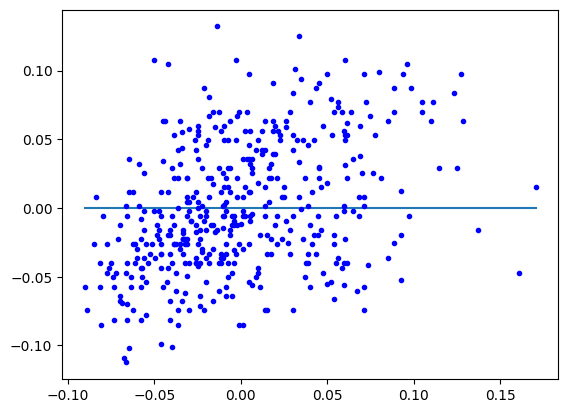

In [56]:
plt.plot(X_line_fitted, y_line_fitted)
plt.plot(X,y,'b.')
plt.show() #ternyata gambar overfitting di ujung kalau degree=10
#kalau 5 lebih mantep
#2 ngefit bagus

What to explore next: 

1. train test split
2. find the best model with higest R2 Score by comparing
   LinearRegression, Ridge, ElasticNet, Lasso, BayesianRidge
3. Hyperparameter tunning
